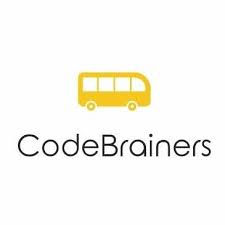

# Python Object-Oriented Programming (OOP)

_Mikołaj Leszczuk_

## Iterowanie

![](https://miro.medium.com/max/1000/0*39LNqv6m-1YIKB4w.jpg)

### Iteratory

> ##### Iteracja
> Iterować, iteracja - to wszystku powinno Ci się kojarzyć z... pętlami. W szczególności pętlami `for`.

#### Protokół iteracji

Wbudowana funkcja `iter` pobiera iterowalny obiekt i zwraca iterator.

In [1]:
l = [1, 2, 3]

In [2]:
l

[1, 2, 3]

In [3]:
x = iter(l)

In [4]:
x

Za każdym razem, gdy wywołujemy metodę `next` w iteratorze, otrzymujemy kolejny element.

In [5]:
next(x)

1

In [6]:
next(x)

2

In [7]:
next(x)

3

Jeśli nie ma więcej elementów, wywołuje wyjątek `StopIteration`.

In [8]:
next(x)

StopIteration: 

#### Iteratory

Iteratory są implementowane jako klasy.

Po obiektach, które implementują metodę specjalną `__next__`, można iterować w taki sam sposób, jak po liście `for element in instancja:`. Klasy, które implementują metodę `__next__` nazywamy **iteratorami**. Przy wywołaniu tej metody, ma ona zwrócić następny element z kolekcji. Jeżeli nie ma więcej elementów w kolekcji, `__next__` ma rzucić wyjątek `StopIteration`.

Klasy, które pozwalają po sobie iterować, posiadają metodę specjalną `__iter__`, która zwraca obiekt iteratora. Nic nie stoi na przeszkodzie, żeby obiekt iterowalny był jednocześnie iteratorem.

Podsumowując:

* Iterator posiada metodę `__next()__`, która zwraca kolejny element z iterowanej sekwencji
* Jeśli iteracja dobiegła końca (brak kolejnych elementów) zgłaszany jest wyjątek `StopIteration`
* Iterator jest zwracany przez funkcję `iter()`

Przykład typu iterowalnego (string) i jego iteratora (`it`):

In [9]:
s = 'abc'

In [10]:
it = iter(s)

In [11]:
it.__next__()

'a'

In [12]:
next(it)

'b'

In [13]:
it.__next__()

'c'

In [14]:
next(it)

StopIteration: 

Oto iterator, który działa jak wbudowana funkcja `range`.

In [15]:
class yrange:
    def __init__(self, n):
        self.i = 0
        self.n = n

    def __iter__(self):
        return self

    def __next__(self):
        if self.i < self.n:
            i = self.i
            self.i += 1
            return i
        else:
            raise StopIteration()

In [16]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [17]:
for i in yrange(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


Wypróbujmy to z `next`:

In [18]:
y = yrange(3)

In [19]:
y

In [20]:
next(y)

0

In [21]:
next(y)

1

In [22]:
next(y)

2

In [23]:
next(y)

StopIteration: 

Wiele funkcji wbudowanych akceptuje iteratory jako argumenty.

In [24]:
list(range(5))

[0, 1, 2, 3, 4]

In [25]:
list(yrange(5))

[0, 1, 2, 3, 4]

In [26]:
sum(range(5))

10

In [27]:
sum(yrange(5))

10

#### Przykład generowania ciągu Fibonacciego i iteratorów

In [28]:
class Fibs:
    def __init__(self, limit):
        self.a = 0
        self.b = 1
        # nie chcemy tego w nieskończoność
        self.limit = limit

    def __next__(self):
        self.a, self.b = self.b, self.a + self.b
        if self.a > self.limit:
            raise StopIteration
        return self.a

    def __iter__(self):
        return self

Wywołanie:

In [29]:
list(Fibs(100))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

#### Zadanie - tasowanie kart

**Część 1**: stwórz klasę kart (`Card`). Pamiętaj, karty mają dwa atrybuty: wartość (2, 3, 4, 5, 6, 7, 8, 9, J, Q, K, A) i kolor (pik, kier, trefl, karo). Stwórz metodę `__str__` zwracającą string karty typu "2 karo", jako "Karta 2♦", ale już karty typu "2 dzwonek", jako "Karta 2 dzwonek". Stwórz metodę `__repr__` zwracającą reprezentację, jako string w otoczeniu znaków "<>".

**Część 2**: stwórz klasę stosu kart (`Deck`), która w metodzie `__init__` będzie generowała listę (na razie posortowaną) całego stosu kart (52 karty). Stwórz metodę `shuffle_cards`, która tasowała będzie w miejscu cały stos kart (możesz użyć `random.shuffle()`).

**Część 3**: napisz metodę `__iter__`, która zwróci iterator. Czy musisz tworzyć sam klasę iteratora? Czy możesz wykorzystać iterator dla innego typu danych?

**Część 4**: dodaj tasowanie stosu kart. W którym miejscu chcesz to zrobić?

> ##### `random.shuffle(x[, random])`
> Tasuje sekwencję *x* na miejscu.
> 
> Opcjonalny argument *random* to 0-argumentowa funkcja zwracająca losową liczbę zmiennoprzecinkową z wartości `[0.0, 1.0)`; domyślnie jest to funkcja `random()`.
> 
> Aby przetasować niezmienną sekwencję i zwrócić nową potasowaną listę, użyj zamiast tego `sample(x, k=len(x))`.
> 
> Zauważ, że nawet dla małych `len(x)`, całkowita liczba permutacji *x* może szybko wzrosnąć do większej niż okres większości generatorów liczb losowych. Oznacza to, że większości permutacji długiej sekwencji nie można nigdy wygenerować. Na przykład sekwencja o długości 2080 jest największą, jaka może zmieścić się w okresie generatora liczb losowych Mersenne Twister.
> 
> *Zdeprecjonowane od wersji 3.9, zostanie usunięte w wersji 3.11:* Opcjonalny parametr *random*.

#### Rozwiązanie - tasowanie kart

In [30]:
import random


class Card:
    def __init__(self, wartosc, kolor):
        self.wartosc = wartosc
        self.kolor = kolor

    def __str__(self):
        znaki = {
            "karo": "♦",
            "kier": "♥",
            "pik": "♠",
            "trefl": "♣",
        }
        if self.kolor in znaki:
            return "Karta {}{}".format(self.wartosc, znaki[self.kolor])
        else:
            return "Karta {} {}".format(self.wartosc, self.kolor)

    def __repr__(self):
        return "<{}>".format(str(self))

Testowanie:

In [31]:
c1 = Card(2, "karo")

In [32]:
print(c1)  # __str__

Karta 2♦


In [33]:
c1         # __repr__

<Karta 2♦>

In [34]:
c2 = Card(3, "dzwonek")

In [35]:
print(c2)  # __str__

Karta 3 dzwonek


In [36]:
c2         # __repr__

<Karta 3 dzwonek>

In [37]:
class Deck:
    def __init__(self):
        wartosci = ["2", "3", "4", "5", "6", "7", "8", "9", "10",
                    "J", "Q", "K", "A"]
        kolory = ["karo", "kier", "pik", "trefl"]

        # wygenerowana talia kart: 2♦, 3♦, 4♦, ..., K♣, A♣
        self.stos = [
            Card(wartosc, kolor)
            for kolor in kolory
            for wartosc in wartosci
        ]

        # tasowanie kart odbywa się w miejscu, tzn. random.shuffle
        # zmienia listę podaną jako argument, ale jej nie musi zwracać
        # random.shuffle(self.stos)
    def shuffle_cards(self):
        random.shuffle(self.stos)

    def __iter__(self):
        # zamiast męczyć się z pisaniem własnego iteratora, zastosujmy
        # iterator wbudowany w Pythona: iterator po liście, która zawiera
        # naszą talię kart
        return iter(self.stos)

Testowanie:

In [38]:
talia = Deck()

In [39]:
for karta in talia:
    print(karta)

Karta 2♦
Karta 3♦
Karta 4♦
Karta 5♦
Karta 6♦
Karta 7♦
Karta 8♦
Karta 9♦
Karta 10♦
Karta J♦
Karta Q♦
Karta K♦
Karta A♦
Karta 2♥
Karta 3♥
Karta 4♥
Karta 5♥
Karta 6♥
Karta 7♥
Karta 8♥
Karta 9♥
Karta 10♥
Karta J♥
Karta Q♥
Karta K♥
Karta A♥
Karta 2♠
Karta 3♠
Karta 4♠
Karta 5♠
Karta 6♠
Karta 7♠
Karta 8♠
Karta 9♠
Karta 10♠
Karta J♠
Karta Q♠
Karta K♠
Karta A♠
Karta 2♣
Karta 3♣
Karta 4♣
Karta 5♣
Karta 6♣
Karta 7♣
Karta 8♣
Karta 9♣
Karta 10♣
Karta J♣
Karta Q♣
Karta K♣
Karta A♣


In [40]:
talia.shuffle_cards()

**Uwaga - kolejność kart będzie każdorazowo losowa**:

In [41]:
for karta in talia:
    print(karta)

Karta 7♠
Karta Q♥
Karta 4♠
Karta A♣
Karta 7♦
Karta 2♠
Karta 10♦
Karta 10♥
Karta 3♥
Karta J♥
Karta 5♣
Karta K♦
Karta 9♥
Karta 10♣
Karta 4♦
Karta Q♦
Karta Q♣
Karta 8♠
Karta 5♦
Karta 6♦
Karta 3♠
Karta 5♠
Karta 8♣
Karta A♥
Karta 3♦
Karta A♠
Karta 8♦
Karta J♣
Karta 4♣
Karta 2♦
Karta 8♥
Karta 7♥
Karta K♣
Karta 7♣
Karta 2♥
Karta K♥
Karta 5♥
Karta K♠
Karta 9♣
Karta 10♠
Karta 9♠
Karta 6♥
Karta 6♣
Karta J♠
Karta 2♣
Karta 9♦
Karta Q♠
Karta 3♣
Karta 6♠
Karta J♦
Karta A♦
Karta 4♥
